In [2]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [3]:


def compute_rainfall_index(df, baseline_start='2000-01-01', baseline_end='2010-12-31'):
    """
    Compute 12-month Rainfall Index (RI) as percentile relative to baseline period.

    Parameters
    ----------
    df : pd.DataFrame
        Must have 'daily_rain' column and datetime index
    baseline_start : str
        Start date of baseline (inclusive)
    baseline_end : str
        End date of baseline (inclusive)

    Returns
    -------
    pd.Series
        RI (0-100) for each date where 6-month rolling sum can be computed
    """

    # 1. compute 6-month rolling sum
    rain_12mo = df['daily_rain'].rolling(window=182, min_periods=182).sum()

    # 2. select baseline period
    baseline_mask = (df.index >= baseline_start) & (df.index <= baseline_end)
    baseline_12mo = rain_12mo[baseline_mask].dropna()

    # 3. compute percentile rank for each date
    def percentile_rank(value):
        return 100 * (baseline_12mo <= value).sum() / len(baseline_12mo)

    ri = rain_12mo.dropna().apply(percentile_rank)

    return ri

In [10]:
df_SILO = pd.read_csv('/Users/phelps/PhD/DATA/climate/SILO/processed/point/tum_SILO_1980-2026.csv', parse_dates=['YYYY-MM-DD'], index_col='YYYY-MM-DD')

In [11]:
RI = compute_rainfall_index(df_SILO, baseline_start='1980-01-01', baseline_end='2009-12-31')

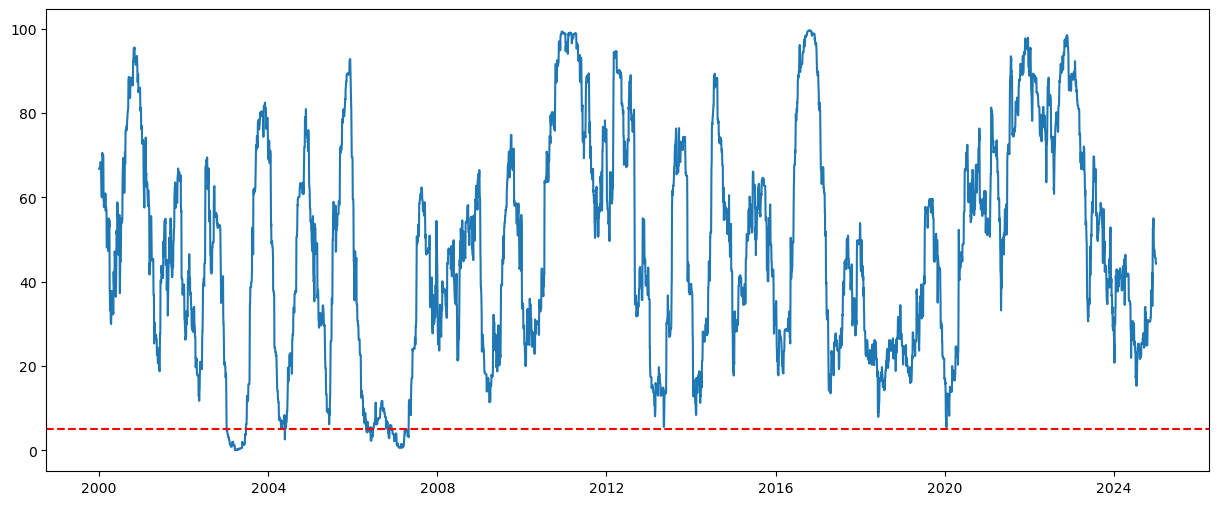

In [12]:

start_year = 2000
end_year = 2024

RI_subset = RI[(RI.index.year >= start_year) & (RI.index.year <= end_year)]

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(RI_subset.index, RI_subset.values, label='Rainfall Index (RI)')

ax.axhline(5, color='red', linestyle='--', label='Drought Threshold (5th Percentile)')